# Linear Regression Assignment

A Chinese automobile company <b>Geely Auto</b> aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They want to specifically understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

We will follow folowing steps for building our model with the variables that are significant, and to be considered by Geely Autos in understanding the car pricing in the American Automobile market:

1. `Reading and understanding the data`

2. `Visualizing the data`

3. `Data Preparation`

4. `Training the model`

5. `Residual analysis`

6. `Predicting and evaluation on the test set`

### At the end we will try to suggest and make some recommendations to Geely Autos to help them enter the US market by establishing their manufacturing unit there


## DATA ANALYSIS WITH PYTHON

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing statsmodel library for statistical summary
import statsmodels.api as sm 

#Importing sklearn methods
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing sklearn RFE and LinearRegression methods
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 600)
pd.set_option('display.max_rows', 50)

## STEP 1: Reading and Understanding the data

In [2]:
dfcar = pd.read_csv('CarPrice_Assignment.csv')
dfcar.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


    Dataset shape          ---- The data contains 205 rows and 26 columns.

    Null value status      ---- None of the values in the dataset are null.

In [3]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
dfcar.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


## Step 2: Visualising the Data

Lets visualise the given dataset to find out any visible clues, and check:
- which features show strong linear relationship with our target variable 'price'.
- the correlation among the features.

#### Visualising All the Variables

Let's make a pairplot of all the variables

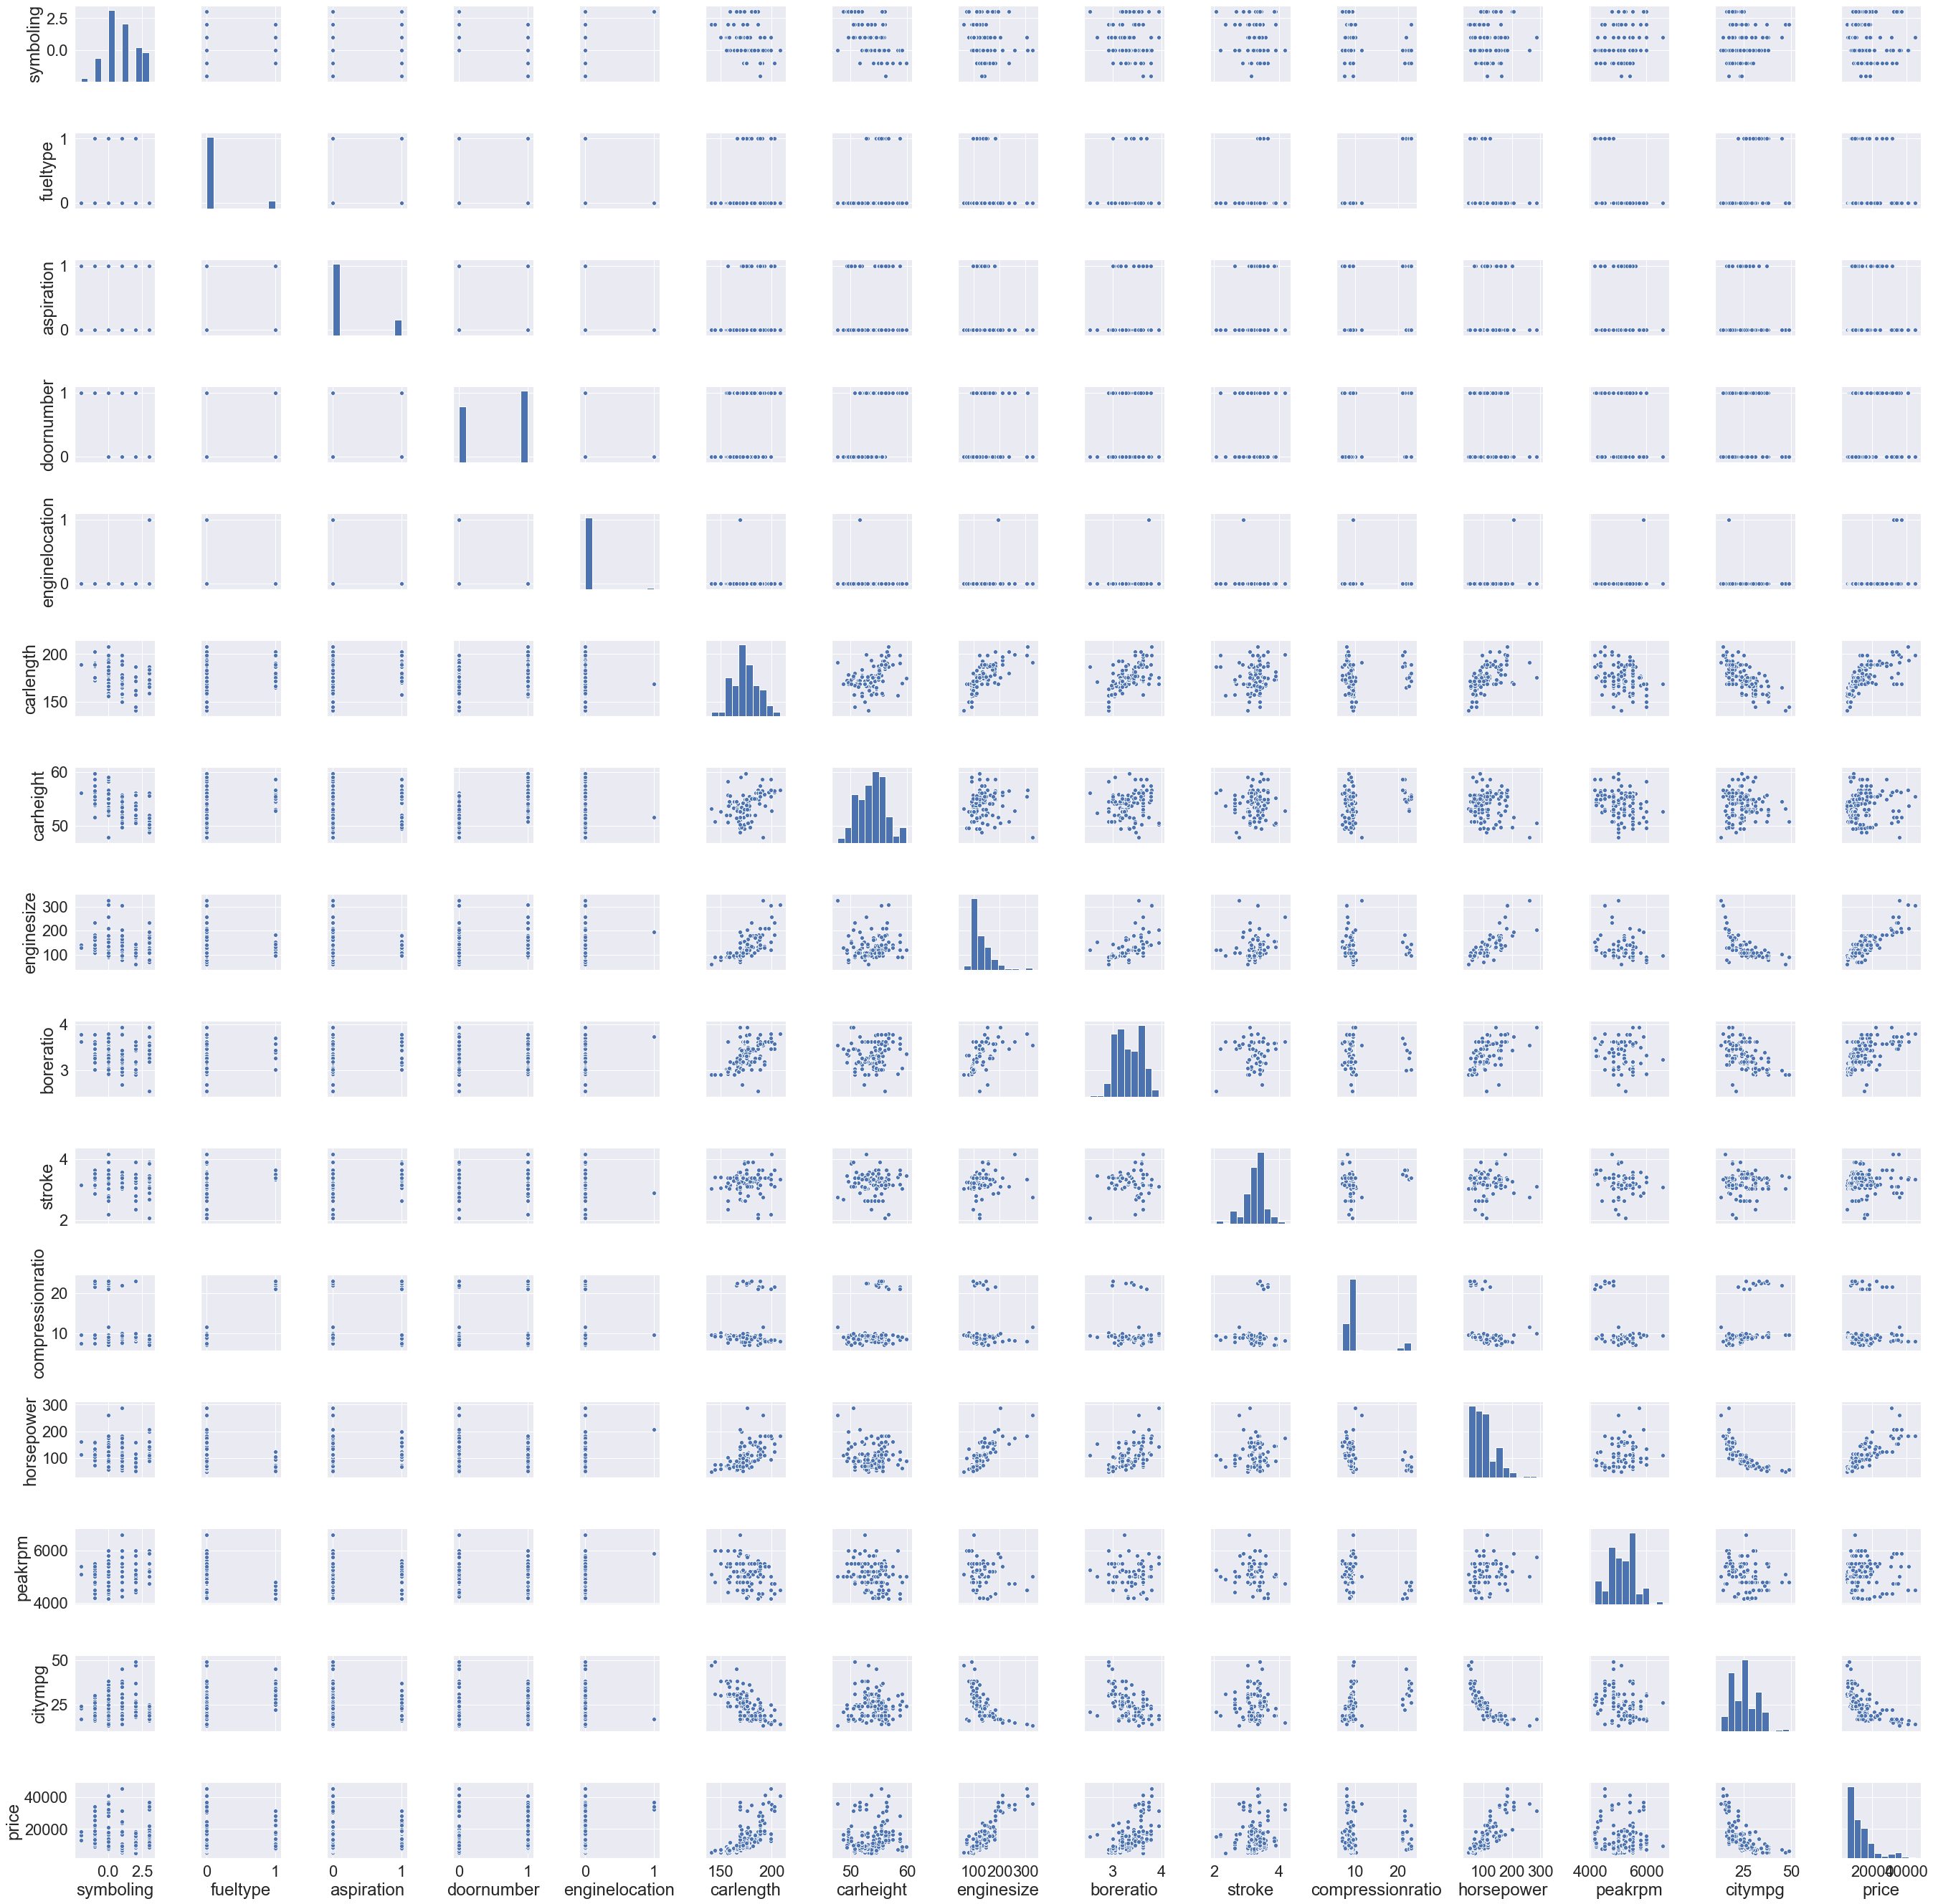

In [89]:
sns.set(font_scale=2)
sns.pairplot(dfcar)

**Observations** from above graphs:

1. When plotted against 'price': most of the independent variables are showing linear behaviour with 'price'. Hence a linear regression model should be a good choice for the given data.

2. Also we see that there are many features that show multicollinearity. Lets check that now.

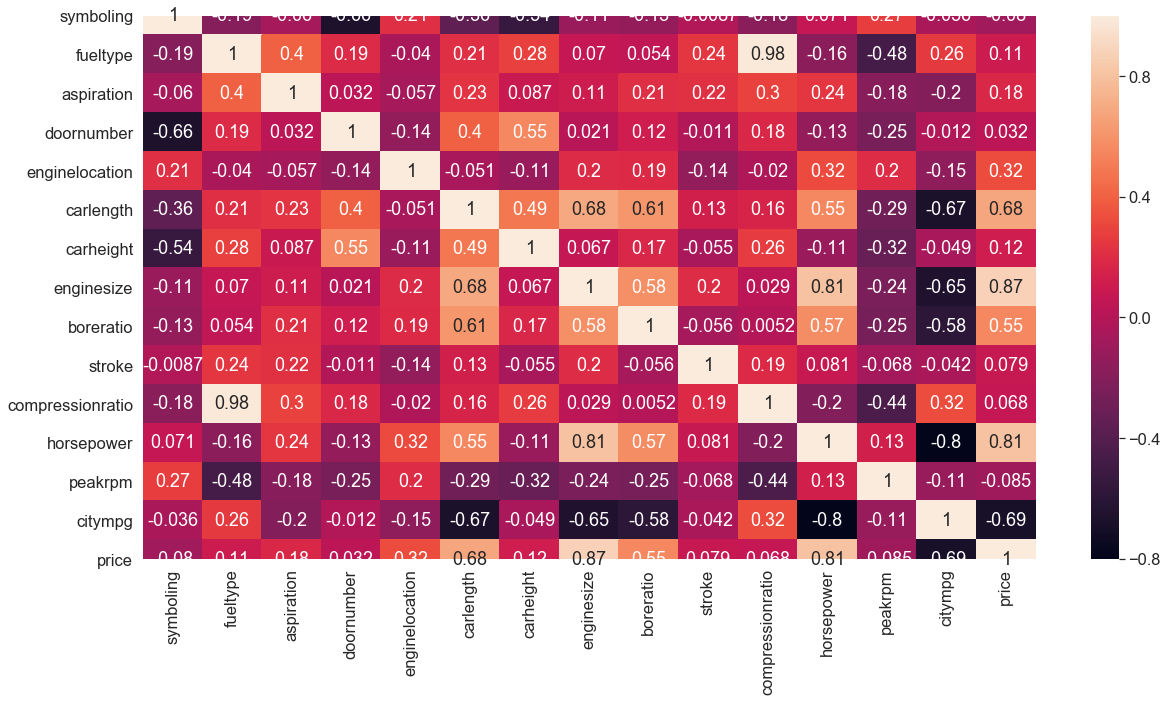

In [90]:
plt.figure(figsize = (20,10))  
sns.set(font_scale=1.5)
sns.heatmap(dfcar.corr(),annot = True)

Looking at the above correlation table, the features:
- highwaympg, citympg are very highly correlated. We can drop one of them. Lets drop highwaympg.

- wheelbase, carlength, carwidth, curbweight, enginesize are highly correlated with each other - **lets plot corr map of just these var. for better readability**

In [5]:
#Lets drop the highwaympg for reasons mentioned above.

dfcar = dfcar.drop(['highwaympg'], axis=1)

In [6]:
plt.figure(figsize = (20,10))
corr1 = dfcar[['wheelbase','carlength','carwidth','curbweight','carheight','enginesize','price']].corr()
corr1.style.background_gradient(cmap='Greens')

,wheelbase,carlength,carwidth,curbweight,carheight,enginesize,price
wheelbase,1,0.874587,0.795144,0.776386,0.589435,0.569329,0.577816
carlength,0.874587,1,0.841118,0.877728,0.491029,0.68336,0.68292
carwidth,0.795144,0.841118,1,0.867032,0.27921,0.735433,0.759325
curbweight,0.776386,0.877728,0.867032,1,0.295572,0.850594,0.835305
carheight,0.589435,0.491029,0.27921,0.295572,1,0.0671487,0.119336
enginesize,0.569329,0.68336,0.735433,0.850594,0.0671487,1,0.874145
price,0.577816,0.68292,0.759325,0.835305,0.119336,0.874145,1


<Figure size 1440x720 with 0 Axes>

#### Observations:

curbweight, carwidth, wheelbase and carlength are highly correlated. Lets just keep one out of these.

- drop `curbweight` -> it is highly correlated with other features.
- drop `carwidth`   -> it is highly correlated with other features.
- drop `wheelbase`  -> it is highly correlated with other features, but lets keep it for now.
- `carheight` is less correlated with others, so we'll keep it for now.
- `enginesize` has a very high corr with 'price', so we'll keep it.

In [7]:
#Lets drop the curbweight, carwidth and wheelbase column for reasons mentioned above.

dfcar = dfcar.drop(['curbweight', 'carwidth', 'wheelbase'], axis=1)

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

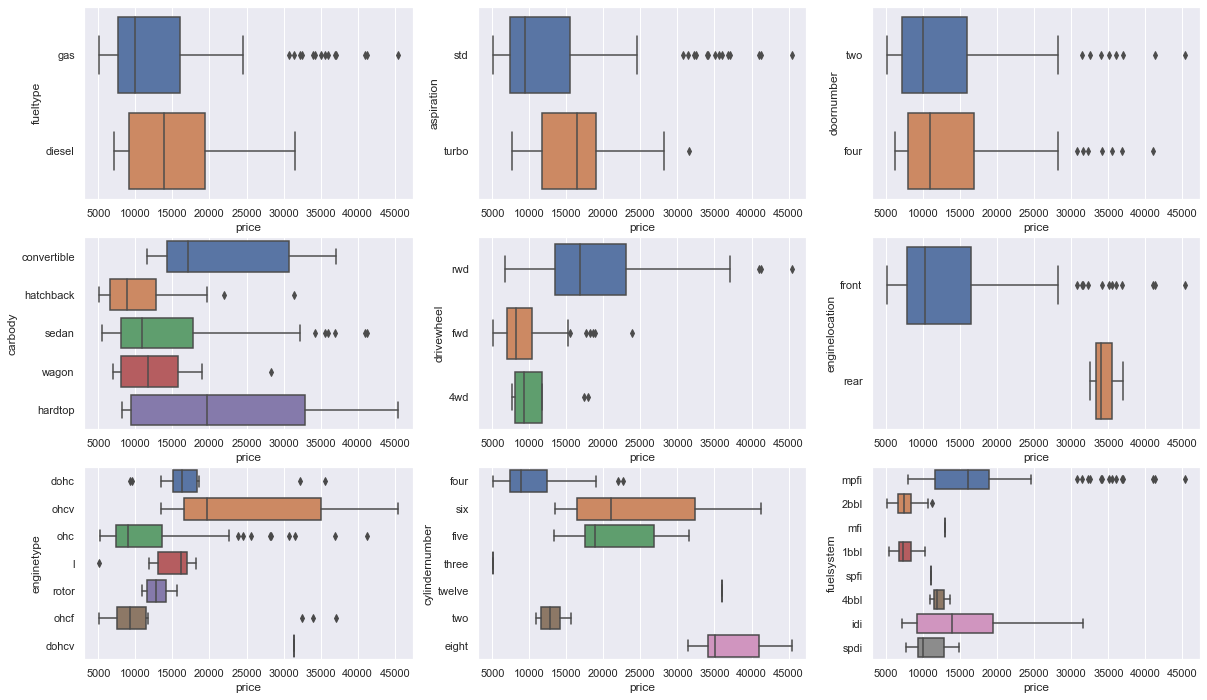

In [8]:
sns.set(font_scale=1)
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'fueltype', x = 'price', data = dfcar)
plt.subplot(3,3,2)
sns.boxplot(y = 'aspiration',x = 'price', data = dfcar)
plt.subplot(3,3,3)
sns.boxplot(y = 'doornumber', x = 'price', data = dfcar)
plt.subplot(3,3,4)
sns.boxplot(y = 'carbody', x = 'price', data = dfcar)
plt.subplot(3,3,5)
sns.boxplot(y = 'drivewheel', x = 'price', data = dfcar)
plt.subplot(3,3,6)
sns.boxplot(y = 'enginelocation', x = 'price', data = dfcar)
plt.subplot(3,3,7)
sns.boxplot(y = 'enginetype', x = 'price', data = dfcar)
plt.subplot(3,3,8)
sns.boxplot(y = 'cylindernumber', x = 'price', data = dfcar)
plt.subplot(3,3,9)
sns.boxplot(y = 'fuelsystem', x = 'price', data = dfcar)

plt.show()

#### Observations:

Lets make some visible observations from the boxplots. This might come handy for intuitive modelling later.

1.Fueltype: not much of a difference on price.

2.Aspiration: turbo is on an average costlier than std.

3.DoorNumber: No visible effect on price.

4.Carbody: Hatchback and Wagon are usually cheaper. Hardtop is available across wide range of price.

5.Drivewheel: rwd is usually costlier.

6.Enginelocation: Rear is clearly expensive.

7.Enginetype: very general.. will check later.

8.Cylindernumber: eight is clearly expensive. three and four are comparatively cheaper.

9.Fuelsystem: very general.. will check later.

Lets create a derived variable containing just the car company name. We do not need the car model information.

In [9]:
dfcar['CarComp'] = dfcar['CarName'].str.replace('-',' ')
dfcar['CarComp'] = dfcar['CarComp'].str.split(' ', n=1, expand=True)[0]

**Notice** that there are some car companies 

- some car companies are duplicates with upper lower case distinction. We need to fix this - we will make all car company names as lowercase.
- some car company names are misplelled, because of which they are being treated as different companies - we need to fix this.


In [10]:
#convert all car company names to lowercase
dfcar['CarComp'] = dfcar['CarComp'].str.lower()

#Note some car company name are entered with typos/ or lowercase. Lets fix that.
correct_name = {'maxda' : 'mazda', 'porcshce' : 'porsche', 'toyouta' : 'toyota', 'vokswagen' : 'volkswagen', 'vw' : 'volkswagen'}
dfcar['CarComp'] = dfcar['CarComp'].replace(correct_name, regex=True)

In [11]:
#Lets drop the CarName and car_ID column as we dont need it anymore
dfcar = dfcar.drop(['CarName', 'car_ID'], axis=1)

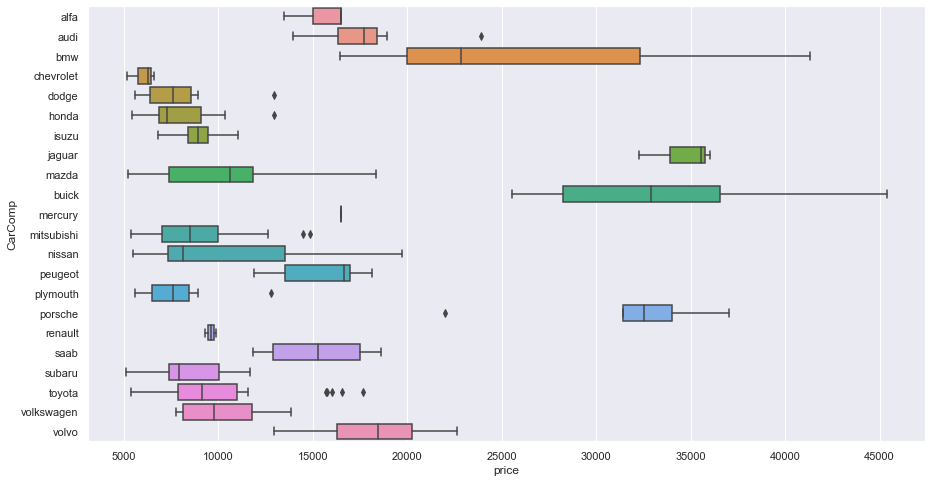

In [12]:
#Lets also visualize the derived feature CarComp

plt.figure(figsize=(15,8))
sns.boxplot(x = 'price', y = 'CarComp', data = dfcar)

- We observe that the car company 'mercury' has just a single entry in the data. Hence wont be of any use. We'll discard it later, when we create dummy var for car company names.

Now lets apply some encoding on the categorical features.

## Step 3: Data Preparation

Categorical feature encoding
- Let us map values like 1,2,3.. for `ordinal feature values`, and create dummy var for the `nominal features values`, so that they can be used in a regression model.

In [13]:
## Ordinal Features:

# dfcar.fueltype.unique()           # 'gas', 'diesel'

dfcar.fueltype = dfcar.fueltype.map({'gas':0, 'diesel':1})

# dfcar.aspiration.unique()         # 'std', 'turbo'

dfcar.aspiration = dfcar.aspiration.map({'std':0, 'turbo':1})

# dfcar.doornumber.unique()         # 'two', 'four'

dfcar.doornumber = dfcar.doornumber.map({'two':0, 'four':1})

# dfcar.enginelocation.unique()     # 'front', 'rear'

dfcar.enginelocation = dfcar.enginelocation.map({'front':0, 'rear':1})

dfcar

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,CarComp
0,3,0,0,0,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa
1,3,0,0,0,convertible,rwd,0,168.8,48.8,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa
2,1,0,0,0,hatchback,rwd,0,171.2,52.4,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa
3,2,0,0,1,sedan,fwd,0,176.6,54.3,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi
4,2,0,0,1,sedan,4wd,0,176.6,54.3,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,1,sedan,rwd,0,188.8,55.5,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,16845.0,volvo
201,-1,0,1,1,sedan,rwd,0,188.8,55.5,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,19045.0,volvo
202,-1,0,0,1,sedan,rwd,0,188.8,55.5,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,21485.0,volvo
203,-1,1,1,1,sedan,rwd,0,188.8,55.5,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,22470.0,volvo


In [14]:
## Nominal Features:

car = pd.get_dummies(dfcar)

# From now on we will use `car` dataset only.

`One unfinished task`: As stated above while plotting the boxplot for CarComp names, since mercury company has just one entry in the data, we don't need it, and hence would drop this `CarComp_mercury` column

In [15]:
car = car.drop(['CarComp_mercury'], axis=1)
car

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_alfa,CarComp_audi,CarComp_bmw,CarComp_buick,CarComp_chevrolet,CarComp_dodge,CarComp_honda,CarComp_isuzu,CarComp_jaguar,CarComp_mazda,CarComp_mitsubishi,CarComp_nissan,CarComp_peugeot,CarComp_plymouth,CarComp_porsche,CarComp_renault,CarComp_saab,CarComp_subaru,CarComp_toyota,CarComp_volkswagen,CarComp_volvo
0,3,0,0,0,0,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,13495.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,168.8,48.8,130,3.47,2.68,9.0,111,5000,21,16500.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,171.2,52.4,152,2.68,3.47,9.0,154,5000,19,16500.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,1,0,176.6,54.3,109,3.19,3.40,10.0,102,5500,24,13950.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,1,0,176.6,54.3,136,3.19,3.40,8.0,115,5500,18,17450.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,1,0,188.8,55.5,141,3.78,3.15,9.5,114,5400,23,16845.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,-1,0,1,1,0,188.8,55.5,141,3.78,3.15,8.7,160,5300,19,19045.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,-1,0,0,1,0,188.8,55.5,173,3.58,2.87,8.8,134,5500,18,21485.0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,-1,1,1,1,0,188.8,55.5,145,3.01,3.40,23.0,106,4800,26,22470.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Step 4: Training the model

Let us start towards building our LR model. Lets first split data into train-test.

In [16]:
# Let us split the dataset 'car' into train and test data (70:30 ratio) using sklearn train_test_split() method

df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use Normalization scaling, and scale all the numeric features. We dont need to do anything with the created dummy variables as they are already 0 or 1, and hence in the range [0,1] 

In [17]:
# Fit on train data

# Create list num_vars(contains the list of numeric predictor variables):

num_vars = ['symboling','carlength','carheight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']

# Lets normalize both df_train and df_test here.

df_train[num_vars] = df_train[num_vars].apply(lambda x: (x- np.mean(x))/(x.max() - x.min()))
df_test[num_vars] = df_test[num_vars].apply(lambda x: (x- np.mean(x))/(x.max() - x.min()))

C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_alfa,CarComp_audi,CarComp_bmw,CarComp_buick,CarComp_chevrolet,CarComp_dodge,CarComp_honda,CarComp_isuzu,CarComp_jaguar,CarComp_mazda,CarComp_mitsubishi,CarComp_nissan,CarComp_peugeot,CarComp_plymouth,CarComp_porsche,CarComp_renault,CarComp_saab,CarComp_subaru,CarComp_toyota,CarComp_volkswagen,CarComp_volvo
count,1.430000e+02,143.000000,143.000000,143.000000,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,9.510652e-18,0.090909,0.181818,0.559441,0.006993,2.833786e-17,-1.760829e-15,-1.380500e-17,1.341196e-16,1.235997e-15,-1.878839e-16,2.426187e-17,1.090814e-16,4.561231e-17,3.765442e-17,0.027972,0.020979,0.342657,0.475524,0.132867,0.055944,0.594406,0.349650,0.069930,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.020979,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.055944,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,2.391999e-01,0.288490,0.387050,0.498199,0.083624,2.048475e-01,2.153776e-01,1.546190e-01,2.071403e-01,1.578431e-01,2.371806e-01,1.655115e-01,1.964384e-01,1.861650e-01,2.156819e-01,0.165472,0.143818,0.476266,0.501156,0.340624,0.230621,0.492733,0.478536,0.255926,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.143818,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.230621,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-5.594406e-01,0.000000,0.000000,0.000000,0.000000,-5.254761e-01,-5.090043e-01,-2.413511e-01,-4.979465e-01,-5.353889e-01,-1.907867e-01,-2.273019e-01,-4.000285e-01,-3.442113e-01,-2.193095e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.594406e-01,0.000000,0.000000,0.000000,0.000000,-1.262892e-01,-1.550220e-01,-1.055020e-01,-1.923909e-01,-7.074239e-02,-9.078671e-02,-1.356352e-01,-1.347224e-01,-1.775447e-01,-1.520111e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated. 

corr = df_train[df_train.columns].corr()
corr.style.background_gradient(cmap='coolwarm')

    Price is showing strong relationship with:

>Positive Corr
   - 'enginesize' (0.867), 'horsepower' (0.806), 'carwidth' (0.799), 'drivewheel_rwd' (0.677), 'wheelbase' (0.622) 
   
>Negative Corr
   - 'citympg' (-0.674), 'drivewheel_fwd' (-0.635), 

Before beginning to build a model, let us again check the scatterplot of features vs price to get a better intuitive understanding.

Car Dimension numeric features:

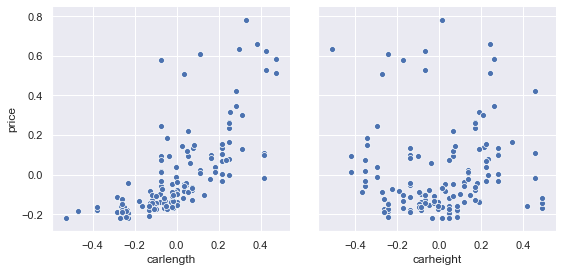

In [21]:
sns.pairplot(df_train, x_vars=['carlength', 'carheight'], y_vars='price',height=4, aspect=1, kind='scatter')
plt.show()

Car engine related numeric features

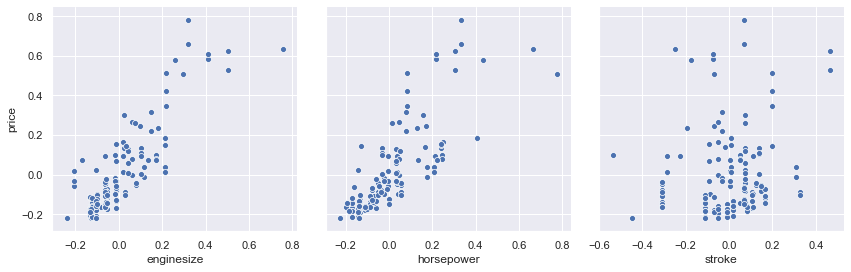

In [22]:
sns.pairplot(df_train, x_vars=['enginesize', 'horsepower', 'stroke'], y_vars='price',height=4, aspect=1, kind='scatter')
plt.show()

Other numeric features

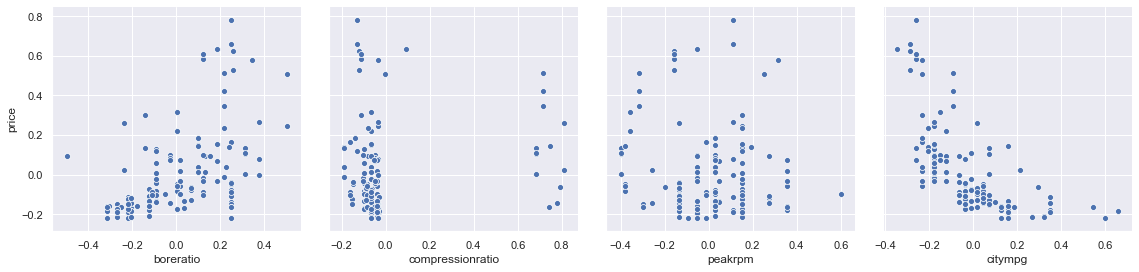

In [23]:
sns.pairplot(df_train, x_vars=['boreratio', 'compressionratio','peakrpm', 'citympg'], y_vars='price',height=4, aspect=1, kind='scatter')
plt.show()

**OBSERVATIONS:**

`carweight`, `enginesize` show strong positive linear relationship with car `price`. 

Also they are important features to have in model for making business decisions for`Geely Automobiles`.

In [24]:
y_train = df_train.pop('price')
X_train = df_train

### Building a linear model

Fit a regression line through the training data using `statsmodels`.

Since there are a lot of variables, we will make use of RFE to determine the top good features.

In [25]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [26]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 47),
 ('fueltype', False, 29),
 ('aspiration', False, 5),
 ('doornumber', False, 50),
 ('enginelocation', False, 37),
 ('carlength', True, 1),
 ('carheight', False, 16),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 51),
 ('horsepower', False, 49),
 ('peakrpm', False, 4),
 ('citympg', False, 48),
 ('carbody_convertible', False, 9),
 ('carbody_hardtop', False, 32),
 ('carbody_hatchback', False, 31),
 ('carbody_sedan', False, 33),
 ('carbody_wagon', False, 36),
 ('drivewheel_4wd', False, 44),
 ('drivewheel_fwd', False, 35),
 ('drivewheel_rwd', False, 38),
 ('enginetype_dohc', False, 8),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 13),
 ('enginetype_ohcf', False, 30),
 ('enginetype_ohcv', False, 7),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 12),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 2

In [27]:
col_in = X_train.columns[rfe.support_]
col_in

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'enginetype_dohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'CarComp_audi', 'CarComp_bmw', 'CarComp_buick', 'CarComp_porsche'],
      dtype='object')

In [28]:
col_out = X_train.columns[~rfe.support_]
col_out

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'carheight', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_six', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'CarComp_alfa',
       'CarComp_chevrolet', 'CarComp_dodge', 'CarComp_honda', 'CarComp_isuzu',
       'CarComp_jaguar', 'CarComp_mazda', 'CarComp_mitsubishi',
       'CarComp_nissan', 'CarComp_peugeot', 'CarComp_plymouth',
       'CarComp_renault', 'CarComp_saab', 'CarComp_subaru', 'CarComp_toyota',
       'CarComp_volkswagen', 'CarComp_volvo'],
      dtype=

### Building model using statsmodel, for the detailed statistics

In [29]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col_in]

#### Define a function that displays the Statistics summary and also return the X_train_lm dataset, and the modeling object

In [30]:
def LRM_Summ(df):
    # Display the linear model summary
    
    #Adding a constant
    X_train_lm = sm.add_constant(df)
    
    #Fit
    lm = sm.OLS(y_train,X_train_lm).fit()
    
    #Printing the statistics summary
    print(lm.summary())
    
    #Returning the X_train_lm dataset and the VIF table for all the features present in the model
    return X_train_lm, lm

#### Defining a function that display VIF of the features present in the model and their correlation matrix

In [31]:
def LRM_VIF_Corr(df):    
    
    # Calculate the VIFs for the current model
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print('\n')
    print(vif)
    
    
    #Printing the correlation matrix of features in the current model along with price
    col_var = list(vif.Features)
    col_var = col_var + ['price']
    corr = car[col_var].corr()
    return(corr.style.background_gradient(cmap='coolwarm'))

**MODEL 1:**

In [32]:
X_train_lmod1, lmod1 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.94e-61
Time:                        00:30:52   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\akhilshu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,enginetype_rotor,cylindernumber_two,enginesize,carlength,cylindernumber_eight,boreratio,enginetype_dohcv,cylindernumber_twelve,CarComp_porsche,CarComp_buick,stroke,cylindernumber_four,CarComp_bmw,CarComp_audi,cylindernumber_three,price
enginetype_rotor,1,1,-0.184762,-0.0578765,-0.022305,0.000127348,-0.00987681,-0.00987681,-0.022305,-0.0284278,-0.000186976,-0.262272,-0.0284278,-0.0265246,-0.00987681,-0.00454416
cylindernumber_two,1,1,-0.184762,-0.0578765,-0.022305,0.000127348,-0.00987681,-0.00987681,-0.022305,-0.0284278,-0.000186976,-0.262272,-0.0284278,-0.0265246,-0.00987681,-0.00454416
enginesize,-0.184762,-0.184762,1,0.68336,0.493638,0.583774,0.128248,0.335555,0.229487,0.483128,0.203129,-0.631431,0.193885,0.0172313,-0.111081,0.874145
carlength,-0.0578765,-0.0578765,0.68336,1,0.245778,0.606454,0.00939082,0.100413,-0.0486819,0.347345,0.129533,-0.40021,0.17112,0.149405,-0.187445,0.68292
cylindernumber_eight,-0.022305,-0.022305,0.493638,0.245778,1,0.211989,0.442807,-0.0110702,0.18,0.621322,-0.0269973,-0.293961,-0.0318626,-0.0297294,-0.0110702,0.478614
boreratio,0.000127348,0.000127348,0.583774,0.606454,0.211989,1,0.158136,0.0544818,0.286897,0.205292,-0.055909,-0.164076,0.107399,-0.109189,-0.108774,0.553173
enginetype_dohcv,-0.00987681,-0.00987681,0.128248,0.00939082,0.442807,0.158136,1,-0.00490196,0.442807,-0.014109,-0.0325449,-0.130168,-0.014109,-0.0131644,-0.00490196,0.159225
cylindernumber_twelve,-0.00987681,-0.00987681,0.335555,0.100413,-0.0110702,0.0544818,-0.00490196,1,-0.0110702,-0.014109,-0.110878,-0.130168,-0.014109,-0.0131644,-0.00490196,0.199634
CarComp_porsche,-0.022305,-0.022305,0.229487,-0.0486819,0.18,0.286897,0.442807,-0.0110702,1,-0.0318626,-0.137181,-0.21816,-0.0318626,-0.0297294,-0.0110702,0.359581
CarComp_buick,-0.0284278,-0.0284278,0.483128,0.347345,0.621322,0.205292,-0.014109,-0.014109,-0.0318626,1,0.114073,-0.374655,-0.0406091,-0.0378903,-0.014109,0.515094


Model 1: 
 - The model contains 15 features.
 - All the features look significant (as per p-value) but notice the extremely high VIF (infinite)

**MODEL 2:**

`engine_rotor` and `cylindernumber_two` have infinite VIF, indicating that they have a correlarion of 1.

We need to drop one of them. Lets drop `engine_rotor`.

In [33]:
X_train_rfe = X_train_rfe.drop(['enginetype_rotor'], axis=1)
car = car.drop(['enginetype_rotor'], axis=1)

X_train_lmod2, lmod2 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.18
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.94e-61
Time:                        00:31:49   Log-Likelihood:                 191.70
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     128   BIC:                            -309.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.17

,enginesize,carlength,cylindernumber_eight,boreratio,enginetype_dohcv,cylindernumber_twelve,CarComp_porsche,CarComp_buick,stroke,cylindernumber_four,cylindernumber_two,CarComp_bmw,CarComp_audi,cylindernumber_three,price
enginesize,1,0.68336,0.493638,0.583774,0.128248,0.335555,0.229487,0.483128,0.203129,-0.631431,-0.184762,0.193885,0.0172313,-0.111081,0.874145
carlength,0.68336,1,0.245778,0.606454,0.00939082,0.100413,-0.0486819,0.347345,0.129533,-0.40021,-0.0578765,0.17112,0.149405,-0.187445,0.68292
cylindernumber_eight,0.493638,0.245778,1,0.211989,0.442807,-0.0110702,0.18,0.621322,-0.0269973,-0.293961,-0.022305,-0.0318626,-0.0297294,-0.0110702,0.478614
boreratio,0.583774,0.606454,0.211989,1,0.158136,0.0544818,0.286897,0.205292,-0.055909,-0.164076,0.000127348,0.107399,-0.109189,-0.108774,0.553173
enginetype_dohcv,0.128248,0.00939082,0.442807,0.158136,1,-0.00490196,0.442807,-0.014109,-0.0325449,-0.130168,-0.00987681,-0.014109,-0.0131644,-0.00490196,0.159225
cylindernumber_twelve,0.335555,0.100413,-0.0110702,0.0544818,-0.00490196,1,-0.0110702,-0.014109,-0.110878,-0.130168,-0.00987681,-0.014109,-0.0131644,-0.00490196,0.199634
CarComp_porsche,0.229487,-0.0486819,0.18,0.286897,0.442807,-0.0110702,1,-0.0318626,-0.137181,-0.21816,-0.022305,-0.0318626,-0.0297294,-0.0110702,0.359581
CarComp_buick,0.483128,0.347345,0.621322,0.205292,-0.014109,-0.014109,-0.0318626,1,0.114073,-0.374655,-0.0284278,-0.0406091,-0.0378903,-0.014109,0.515094
stroke,0.203129,0.129533,-0.0269973,-0.055909,-0.0325449,-0.110878,-0.137181,0.114073,1,-0.111046,-0.000186976,-0.0566321,0.0869022,-0.0504495,0.0794431
cylindernumber_four,-0.631431,-0.40021,-0.293961,-0.164076,-0.130168,-0.130168,-0.21816,-0.374655,-0.111046,1,-0.262272,-0.253894,-0.285185,-0.130168,-0.697762


**MODEL 3:**

Since the p-value of `enginetype_dohcv` is 0.064 (> 0.05), hence we'll drop `enginetype_dohcv`

In [34]:
X_train_rfe = X_train_rfe.drop(['enginetype_dohcv'], axis=1)
car = car.drop(['enginetype_dohcv'], axis=1)

X_train_lmod3, lmod3 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           4.78e-61
Time:                        00:31:55   Log-Likelihood:                 189.78
No. Observations:                 143   AIC:                            -351.6
Df Residuals:                     129   BIC:                            -310.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

,enginesize,carlength,boreratio,cylindernumber_twelve,cylindernumber_eight,stroke,CarComp_buick,CarComp_porsche,cylindernumber_four,cylindernumber_two,CarComp_bmw,CarComp_audi,cylindernumber_three,price
enginesize,1,0.68336,0.583774,0.335555,0.493638,0.203129,0.483128,0.229487,-0.631431,-0.184762,0.193885,0.0172313,-0.111081,0.874145
carlength,0.68336,1,0.606454,0.100413,0.245778,0.129533,0.347345,-0.0486819,-0.40021,-0.0578765,0.17112,0.149405,-0.187445,0.68292
boreratio,0.583774,0.606454,1,0.0544818,0.211989,-0.055909,0.205292,0.286897,-0.164076,0.000127348,0.107399,-0.109189,-0.108774,0.553173
cylindernumber_twelve,0.335555,0.100413,0.0544818,1,-0.0110702,-0.110878,-0.014109,-0.0110702,-0.130168,-0.00987681,-0.014109,-0.0131644,-0.00490196,0.199634
cylindernumber_eight,0.493638,0.245778,0.211989,-0.0110702,1,-0.0269973,0.621322,0.18,-0.293961,-0.022305,-0.0318626,-0.0297294,-0.0110702,0.478614
stroke,0.203129,0.129533,-0.055909,-0.110878,-0.0269973,1,0.114073,-0.137181,-0.111046,-0.000186976,-0.0566321,0.0869022,-0.0504495,0.0794431
CarComp_buick,0.483128,0.347345,0.205292,-0.014109,0.621322,0.114073,1,-0.0318626,-0.374655,-0.0284278,-0.0406091,-0.0378903,-0.014109,0.515094
CarComp_porsche,0.229487,-0.0486819,0.286897,-0.0110702,0.18,-0.137181,-0.0318626,1,-0.21816,-0.022305,-0.0318626,-0.0297294,-0.0110702,0.359581
cylindernumber_four,-0.631431,-0.40021,-0.164076,-0.130168,-0.293961,-0.111046,-0.374655,-0.21816,1,-0.262272,-0.253894,-0.285185,-0.130168,-0.697762
cylindernumber_two,-0.184762,-0.0578765,0.000127348,-0.00987681,-0.022305,-0.000186976,-0.0284278,-0.022305,-0.262272,1,-0.0284278,-0.0265246,-0.00987681,-0.00454416


**MODEL 4:**


Since the p-value of `cylindernumber_eight` is 0.068 (> 0.05), hence we'll drop `cylindernumber_eight`

In [35]:
X_train_rfe = X_train_rfe.drop(['cylindernumber_eight'], axis=1)

car = car.drop(['cylindernumber_eight'], axis=1)

X_train_lmod4, lmod4 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     107.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.37e-61
Time:                        00:32:02   Log-Likelihood:                 187.92
No. Observations:                 143   AIC:                            -349.8
Df Residuals:                     130   BIC:                            -311.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

,enginesize,carlength,boreratio,cylindernumber_twelve,stroke,CarComp_porsche,cylindernumber_four,CarComp_buick,cylindernumber_two,CarComp_bmw,CarComp_audi,cylindernumber_three,price
enginesize,1,0.68336,0.583774,0.335555,0.203129,0.229487,-0.631431,0.483128,-0.184762,0.193885,0.0172313,-0.111081,0.874145
carlength,0.68336,1,0.606454,0.100413,0.129533,-0.0486819,-0.40021,0.347345,-0.0578765,0.17112,0.149405,-0.187445,0.68292
boreratio,0.583774,0.606454,1,0.0544818,-0.055909,0.286897,-0.164076,0.205292,0.000127348,0.107399,-0.109189,-0.108774,0.553173
cylindernumber_twelve,0.335555,0.100413,0.0544818,1,-0.110878,-0.0110702,-0.130168,-0.014109,-0.00987681,-0.014109,-0.0131644,-0.00490196,0.199634
stroke,0.203129,0.129533,-0.055909,-0.110878,1,-0.137181,-0.111046,0.114073,-0.000186976,-0.0566321,0.0869022,-0.0504495,0.0794431
CarComp_porsche,0.229487,-0.0486819,0.286897,-0.0110702,-0.137181,1,-0.21816,-0.0318626,-0.022305,-0.0318626,-0.0297294,-0.0110702,0.359581
cylindernumber_four,-0.631431,-0.40021,-0.164076,-0.130168,-0.111046,-0.21816,1,-0.374655,-0.262272,-0.253894,-0.285185,-0.130168,-0.697762
CarComp_buick,0.483128,0.347345,0.205292,-0.014109,0.114073,-0.0318626,-0.374655,1,-0.0284278,-0.0406091,-0.0378903,-0.014109,0.515094
cylindernumber_two,-0.184762,-0.0578765,0.000127348,-0.00987681,-0.000186976,-0.022305,-0.262272,-0.0284278,1,-0.0284278,-0.0265246,-0.00987681,-0.00454416
CarComp_bmw,0.193885,0.17112,0.107399,-0.014109,-0.0566321,-0.0318626,-0.253894,-0.0406091,-0.0284278,1,-0.0378903,-0.014109,0.324731


All the features seem to be farily significant. Lets look above at the correlation table to find any visible multicollinearity.

**MODEL 5:**

Notice that `cylindernumber_four` is highly (negatively) correlated with `enginesize`, hence we'll drop `cylindernumber_four`.

In [36]:
X_train_rfe = X_train_rfe.drop(['cylindernumber_four'], axis=1)

car = car.drop(['cylindernumber_four'], axis=1)

X_train_lmod5, lmod5 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.44e-61
Time:                        00:32:27   Log-Likelihood:                 184.86
No. Observations:                 143   AIC:                            -345.7
Df Residuals:                     131   BIC:                            -310.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.03

,enginesize,carlength,boreratio,cylindernumber_twelve,stroke,CarComp_porsche,CarComp_buick,cylindernumber_two,CarComp_bmw,CarComp_audi,cylindernumber_three,price
enginesize,1,0.68336,0.583774,0.335555,0.203129,0.229487,0.483128,-0.184762,0.193885,0.0172313,-0.111081,0.874145
carlength,0.68336,1,0.606454,0.100413,0.129533,-0.0486819,0.347345,-0.0578765,0.17112,0.149405,-0.187445,0.68292
boreratio,0.583774,0.606454,1,0.0544818,-0.055909,0.286897,0.205292,0.000127348,0.107399,-0.109189,-0.108774,0.553173
cylindernumber_twelve,0.335555,0.100413,0.0544818,1,-0.110878,-0.0110702,-0.014109,-0.00987681,-0.014109,-0.0131644,-0.00490196,0.199634
stroke,0.203129,0.129533,-0.055909,-0.110878,1,-0.137181,0.114073,-0.000186976,-0.0566321,0.0869022,-0.0504495,0.0794431
CarComp_porsche,0.229487,-0.0486819,0.286897,-0.0110702,-0.137181,1,-0.0318626,-0.022305,-0.0318626,-0.0297294,-0.0110702,0.359581
CarComp_buick,0.483128,0.347345,0.205292,-0.014109,0.114073,-0.0318626,1,-0.0284278,-0.0406091,-0.0378903,-0.014109,0.515094
cylindernumber_two,-0.184762,-0.0578765,0.000127348,-0.00987681,-0.000186976,-0.022305,-0.0284278,1,-0.0284278,-0.0265246,-0.00987681,-0.00454416
CarComp_bmw,0.193885,0.17112,0.107399,-0.014109,-0.0566321,-0.0318626,-0.0406091,-0.0284278,1,-0.0378903,-0.014109,0.324731
CarComp_audi,0.0172313,0.149405,-0.109189,-0.0131644,0.0869022,-0.0297294,-0.0378903,-0.0265246,-0.0378903,1,-0.0131644,0.108117


**MODEL 6:**

The `cylindernumber_twelve` is having a high p-value of 0.149. Lets drop this feature and check.

In [37]:
X_train_rfe = X_train_rfe.drop(['cylindernumber_twelve'], axis=1)

car = car.drop(['cylindernumber_twelve'], axis=1)

X_train_lmod6, lmod6 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     122.8
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           8.52e-62
Time:                        00:32:49   Log-Likelihood:                 183.72
No. Observations:                 143   AIC:                            -345.4
Df Residuals:                     132   BIC:                            -312.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0344 

,carlength,enginesize,boreratio,CarComp_porsche,stroke,CarComp_buick,CarComp_audi,cylindernumber_two,CarComp_bmw,cylindernumber_three,price
carlength,1,0.68336,0.606454,-0.0486819,0.129533,0.347345,0.149405,-0.0578765,0.17112,-0.187445,0.68292
enginesize,0.68336,1,0.583774,0.229487,0.203129,0.483128,0.0172313,-0.184762,0.193885,-0.111081,0.874145
boreratio,0.606454,0.583774,1,0.286897,-0.055909,0.205292,-0.109189,0.000127348,0.107399,-0.108774,0.553173
CarComp_porsche,-0.0486819,0.229487,0.286897,1,-0.137181,-0.0318626,-0.0297294,-0.022305,-0.0318626,-0.0110702,0.359581
stroke,0.129533,0.203129,-0.055909,-0.137181,1,0.114073,0.0869022,-0.000186976,-0.0566321,-0.0504495,0.0794431
CarComp_buick,0.347345,0.483128,0.205292,-0.0318626,0.114073,1,-0.0378903,-0.0284278,-0.0406091,-0.014109,0.515094
CarComp_audi,0.149405,0.0172313,-0.109189,-0.0297294,0.0869022,-0.0378903,1,-0.0265246,-0.0378903,-0.0131644,0.108117
cylindernumber_two,-0.0578765,-0.184762,0.000127348,-0.022305,-0.000186976,-0.0284278,-0.0265246,1,-0.0284278,-0.00987681,-0.00454416
CarComp_bmw,0.17112,0.193885,0.107399,-0.0318626,-0.0566321,-0.0406091,-0.0378903,-0.0284278,1,-0.014109,0.324731
cylindernumber_three,-0.187445,-0.111081,-0.108774,-0.0110702,-0.0504495,-0.014109,-0.0131644,-0.00987681,-0.014109,1,-0.0713878


**MODEL 7:**

Notice `stroke` has a high p-value, and also `stroke` has considerable correlation with `enginesize` and `carlength`. Hence dropping it would be a good idea.

In [38]:
X_train_rfe = X_train_rfe.drop(['stroke'], axis=1)

car = car.drop(['stroke'], axis=1)

X_train_lmod7, lmod7 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     135.5
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.71e-62
Time:                        00:33:06   Log-Likelihood:                 182.76
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     133   BIC:                            -315.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0346 

,carlength,enginesize,boreratio,CarComp_porsche,CarComp_buick,CarComp_audi,cylindernumber_two,CarComp_bmw,cylindernumber_three,price
carlength,1,0.68336,0.606454,-0.0486819,0.347345,0.149405,-0.0578765,0.17112,-0.187445,0.68292
enginesize,0.68336,1,0.583774,0.229487,0.483128,0.0172313,-0.184762,0.193885,-0.111081,0.874145
boreratio,0.606454,0.583774,1,0.286897,0.205292,-0.109189,0.000127348,0.107399,-0.108774,0.553173
CarComp_porsche,-0.0486819,0.229487,0.286897,1,-0.0318626,-0.0297294,-0.022305,-0.0318626,-0.0110702,0.359581
CarComp_buick,0.347345,0.483128,0.205292,-0.0318626,1,-0.0378903,-0.0284278,-0.0406091,-0.014109,0.515094
CarComp_audi,0.149405,0.0172313,-0.109189,-0.0297294,-0.0378903,1,-0.0265246,-0.0378903,-0.0131644,0.108117
cylindernumber_two,-0.0578765,-0.184762,0.000127348,-0.022305,-0.0284278,-0.0265246,1,-0.0284278,-0.00987681,-0.00454416
CarComp_bmw,0.17112,0.193885,0.107399,-0.0318626,-0.0406091,-0.0378903,-0.0284278,1,-0.014109,0.324731
cylindernumber_three,-0.187445,-0.111081,-0.108774,-0.0110702,-0.014109,-0.0131644,-0.00987681,-0.014109,1,-0.0713878
price,0.68292,0.874145,0.553173,0.359581,0.515094,0.108117,-0.00454416,0.324731,-0.0713878,1


**MODEL 8:**

The feature `boreratio` has a high p-value. Lets drop it and check if there is significant change

In [39]:
X_train_rfe = X_train_rfe.drop(['boreratio'], axis=1)

car = car.drop(['boreratio'], axis=1)

X_train_lmod8, lmod8 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     151.1
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           3.47e-63
Time:                        00:33:24   Log-Likelihood:                 181.74
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     134   BIC:                            -318.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0346 

,enginesize,carlength,CarComp_buick,CarComp_porsche,cylindernumber_two,CarComp_bmw,cylindernumber_three,CarComp_audi,price
enginesize,1,0.68336,0.483128,0.229487,-0.184762,0.193885,-0.111081,0.0172313,0.874145
carlength,0.68336,1,0.347345,-0.0486819,-0.0578765,0.17112,-0.187445,0.149405,0.68292
CarComp_buick,0.483128,0.347345,1,-0.0318626,-0.0284278,-0.0406091,-0.014109,-0.0378903,0.515094
CarComp_porsche,0.229487,-0.0486819,-0.0318626,1,-0.022305,-0.0318626,-0.0110702,-0.0297294,0.359581
cylindernumber_two,-0.184762,-0.0578765,-0.0284278,-0.022305,1,-0.0284278,-0.00987681,-0.0265246,-0.00454416
CarComp_bmw,0.193885,0.17112,-0.0406091,-0.0318626,-0.0284278,1,-0.014109,-0.0378903,0.324731
cylindernumber_three,-0.111081,-0.187445,-0.014109,-0.0110702,-0.00987681,-0.014109,1,-0.0131644,-0.0713878
CarComp_audi,0.0172313,0.149405,-0.0378903,-0.0297294,-0.0265246,-0.0378903,-0.0131644,1,0.108117
price,0.874145,0.68292,0.515094,0.359581,-0.00454416,0.324731,-0.0713878,0.108117,1


Dropping `boreratio` had almost no drop in Adjusted R-square which is a good thing.

**MODEL 9:**

Now lets drop `cylindernumber_three` which is having a high significant value of 0.07.

In [40]:
X_train_rfe = X_train_rfe.drop(['cylindernumber_three'], axis=1)

car = car.drop(['cylindernumber_three'], axis=1)

X_train_lmod9, lmod9 = LRM_Summ(X_train_rfe)
LRM_VIF_Corr(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     169.3
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           1.32e-63
Time:                        00:34:06   Log-Likelihood:                 179.98
No. Observations:                 143   AIC:                            -344.0
Df Residuals:                     135   BIC:                            -320.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0338      0

,enginesize,carlength,CarComp_buick,CarComp_porsche,cylindernumber_two,CarComp_bmw,CarComp_audi,price
enginesize,1,0.68336,0.483128,0.229487,-0.184762,0.193885,0.0172313,0.874145
carlength,0.68336,1,0.347345,-0.0486819,-0.0578765,0.17112,0.149405,0.68292
CarComp_buick,0.483128,0.347345,1,-0.0318626,-0.0284278,-0.0406091,-0.0378903,0.515094
CarComp_porsche,0.229487,-0.0486819,-0.0318626,1,-0.022305,-0.0318626,-0.0297294,0.359581
cylindernumber_two,-0.184762,-0.0578765,-0.0284278,-0.022305,1,-0.0284278,-0.0265246,-0.00454416
CarComp_bmw,0.193885,0.17112,-0.0406091,-0.0318626,-0.0284278,1,-0.0378903,0.324731
CarComp_audi,0.0172313,0.149405,-0.0378903,-0.0297294,-0.0265246,-0.0378903,1,0.108117
price,0.874145,0.68292,0.515094,0.359581,-0.00454416,0.324731,0.108117,1


#### Our model looks fairly well at this point. The features in our model are all significant and also the VIF associated with the features are all below 2.6. We can perform some more feature trimming, but it might backfire as it will bring further more cutting, hence reducing our feature size.

#### Let us now do some Residual Analysis, followed by our Model Evaluation

## Step 5: Residual Analysis on the training data

In [41]:
y_train_pred = lmod9.predict(X_train_lmod9)

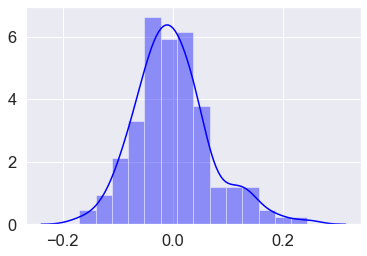

In [141]:
res = y_train - y_train_pred
sns.distplot(res, color = 'blue')

## Step 6: Predication and Evaluation on the test set

In [43]:
y_test = df_test.pop('price')
X_test = df_test

In [44]:
# Adding  constant variable to test dataframe
X_test_lmod9 = sm.add_constant(X_test)
X_test_lmod9.head()

,const,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_alfa,CarComp_audi,CarComp_bmw,CarComp_buick,CarComp_chevrolet,CarComp_dodge,CarComp_honda,CarComp_isuzu,CarComp_jaguar,CarComp_mazda,CarComp_mitsubishi,CarComp_nissan,CarComp_peugeot,CarComp_plymouth,CarComp_porsche,CarComp_renault,CarComp_saab,CarComp_subaru,CarComp_toyota,CarComp_volkswagen,CarComp_volvo
160,1.0,-0.183871,0,0,1,0,-0.145009,-0.108096,-0.145866,-0.151818,-0.129914,-0.084375,-0.243392,-0.128045,0.549059,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,1.0,0.216129,0,0,1,0,-0.059970,0.151520,-0.097831,-0.151818,0.072272,-0.084375,-0.146618,0.055629,0.090726,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,1.0,0.016129,0,0,0,0,0.036093,-0.040788,-0.041062,0.006912,0.066808,-0.109375,-0.153070,-0.128045,0.049059,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
165,1.0,0.016129,0,0,0,0,-0.107214,-0.146557,-0.145866,-0.112135,-0.102591,-0.059375,0.027575,0.606649,0.049059,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,1.0,0.216129,0,0,0,0,-0.286741,0.151520,-0.102197,0.189452,-0.343028,-0.103125,-0.224037,-0.291310,0.049059,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
# print(X_train_lmod1.columns)
# print(X_train_lmod9.columns)

In [46]:
# Creating X_test_lm9 dataframe by dropping variables from X_test_lm9
X_test_lmod9 = X_test_lmod9.drop(col_out, axis=1)
X_test_lmod9 = X_test_lmod9.drop(['enginetype_dohcv', 'enginetype_rotor', 'cylindernumber_eight',
       'cylindernumber_four', 'cylindernumber_three', 'stroke', 'boreratio', 'cylindernumber_twelve'], axis=1)
X_test_lmod9.head()

,const,carlength,enginesize,cylindernumber_two,CarComp_audi,CarComp_bmw,CarComp_buick,CarComp_porsche
160,1.0,-0.145009,-0.145866,0,0,0,0,0
186,1.0,-0.059970,-0.097831,0,0,0,0,0
59,1.0,0.036093,-0.041062,0,0,0,0,0
165,1.0,-0.107214,-0.145866,0,0,0,0,0
140,1.0,-0.286741,-0.102197,0,0,0,0,0


In [47]:
#Predict
y_test_pred = lmod9.predict(X_test_lmod9)

In [48]:
#Evaluate the model
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8567884121779168

Text(0, 0.5, 'Car Price')

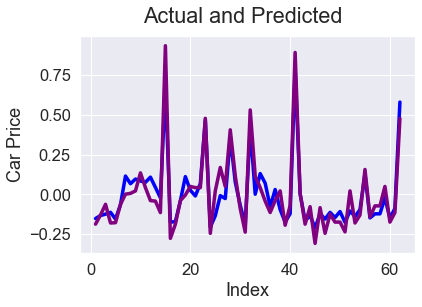

In [94]:
# Actual vs Predicted
index = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(index,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(index,y_test_pred, color="purple",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted')              # Plot heading 
plt.xlabel('Index')                               # X-label
plt.ylabel('Car Price')  

Text(0, 0.5, 'y_test_pred')

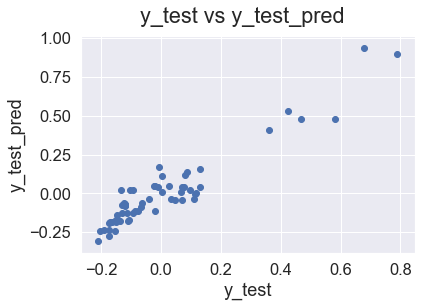

In [93]:
#Plotting y_test against y_pred to see the relationship.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred')              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_test_pred')     

The y_test_pred and y_test show a linear relation for most of the values. The other isolated points as seen above in the plot are the outliers, and not of much significance. The important point to note here is that the y_test and y_test_pred are following a somewhat linear relation, which in other words mean that the y_test_pred is able to consistently predict the values similar to the actual values carried by the y_test data. 

### Assessing the Model:
Lets scatter plot the error and see if the error is random or shows some pattern. The desired outcome is that there should be no visible pattern, and the distribution should be random.

Text(0, 0.5, 'y_test - y_test_pred')

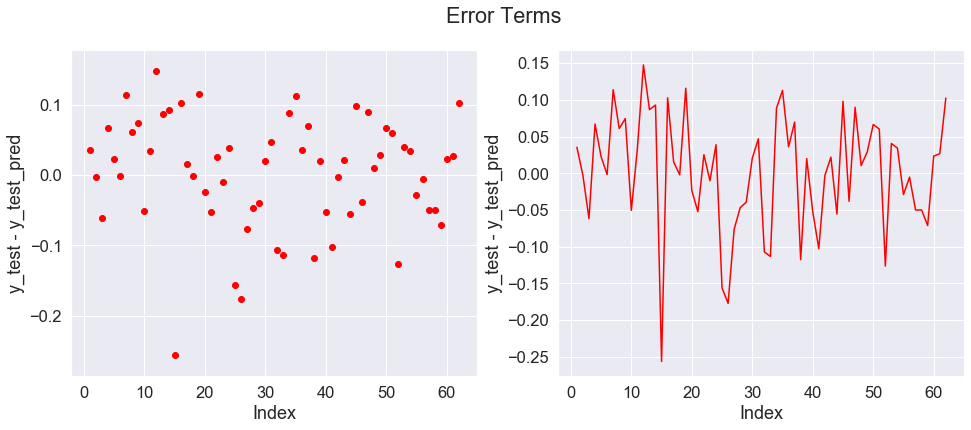

In [124]:
# Error terms
fig = plt.figure(figsize = (16,6))

index = [i for i in range(1,63)]

#To see the randomness with dots
plt.subplot(1,2,1)
plt.scatter(index, y_test-y_test_pred, color = 'red')

fig.suptitle('Error Terms')              # Plot heading 
plt.xlabel('Index')                      # X-label
plt.ylabel('y_test - y_test_pred')                # Y-label


# To join the randomness with dots to see if it has any pattern
plt.subplot(1,2,2)
plt.plot(index, y_test-y_test_pred, color="red")

fig.suptitle('Error Terms')              # Plot heading 
plt.xlabel('Index')                      # X-label
plt.ylabel('y_test - y_test_pred')                # Y-label

> In the above scatterplot, the error is randomly distributed and it does not follow any pattern. 

Text(0, 0.5, 'Index')

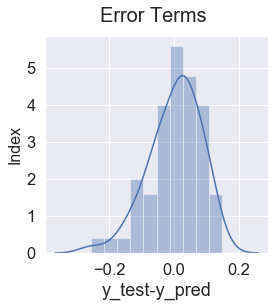

In [132]:
# Let us plot the histogram plot of the error terms to see if they follow the Normal Distribution.

fig = plt.figure(figsize = (4,4))

sns.distplot((y_test - y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)             

> Also the (y_test - y_test_pred) is following a Normal distribution with mean close to zero (~0.00241)

> The above model shows an R-square and adjusted R-square value of `0.898` and `0.892`.
> Also the predicted values from the test data shows an R-square of `0.861`, which is pretty close to the one observed on the training data, and hence displays a good model.

(I have tried many other models as well, and they are all comparable. The accuracy of this model is pretty good. And also the error distribution is much more random in this model compared to the others that I had tried. There can of-course be other models, that show similar or slightly better results.)

In [133]:
# Have already calculated the R2 score above, but showing the result again here.

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8567884121779168

## Inference
  
1. The R2 score of the predicted test data value is 86.1% which is pretty close to Adj R-square of the train data. This indicates that our model is able to predict the target var. values pretty well.

2. The R square and Adjusted R square value in the training data are almost similar @ 86.8% and 86.2% respectively, which indicates that there is almost no redundany in the variables that we have chosen, and they all hold significance.

3. The scatter plot of the Error Terms (y_test-y-pred) shows that the error terms are randomly distributed, and does not follow any visible pattern, which indicates that it is just the white noise. 

4. The R2 score of the predicted test data value is 86.1% which is pretty close to Adj R-square of the train data. This indicates that our model is able to predict the target var. values pretty well.

5. From the histogram plot of the error terms in the test data, we can see that the error terms are following a Normal Distribution centered around a mean of close to `zero`. 

6. The predictor variables that can affect the car price are:

   1.`carlength`, 
   
   2.`enginesize`, 
   
   3.`cylindernumber_two`,
   
   4.`CarComp_audi`,
   
   5.`CarComp_bmw`, 
   
   6.`CarComp_buick`,
   
   7.`CarComp_porsche`

# `Recommendations to Geely Autos:`
>As per the model, the car price American automobile market is largely driven by the `carlength` and `enginesize`. The number of `cylinders` used as a gas fuel is also relevent to some extent in determining the prices.

>The car brands, particularly `Audi`, `BMW`, `Buick`, `Porsche` also drive the car price in the American Automobile Market. So Geely Autos can invest time in studying these car brands particularly, which will help them in making decisions regarding the consumer auto choice in the American Market, while they set up their manufacturing unit in US market.